#### Bibliotecas de Python

###  Primeros pasos en Deep Learning para imágenes

Ya conoces la importancia del manejo de tensores y sus operaciones en TensorFlow lo que te hace capaz de representar información relevante que tu entorno laboral pueda generar. Normalmente estamos acostumbrados a recibir la información en hojas de cálculo que contienen en su mayoría datos numéricos y de texto. Sin embargo, te has preguntado ¿qué tendrías que hacer cuando la información relevante producida por tu entorno laboral, organización o proyecto personal son imágenes? 

Para que te puedas dar una mejor idea de cómo responder a esta pregunta tomaremos como punto de partida el problema que tiene un agricultor el cual desea incorporar modelos inteligentes a partir de imágenes para realizar diversas tareas automáticamente como clasificación de cultivos, detección de plagas, control producción, etcétera. 


Antes de cualquier cosa el agricultor y sus consultores deben representar los datos que hay dentro de las imágenes haciendo uso de Python y TensorFlow. Tomando el papel de uno de los consultores sabes que los tensores son objetos dentro de TensorFlow que te ayudarán a representar los datos de las imágenes, sin embargo, debemos explicarte primero como se organizan estos datos dentro de las imágenes. Para nuestra explicación usaremos una imagen de trigo correspondiente a la cosecha del año pasado. 

Figura 1
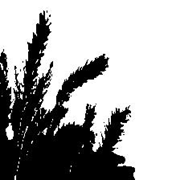

Figura 2
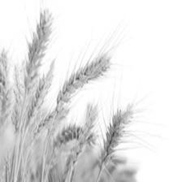

Figura 3
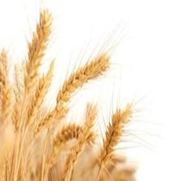

Es muy importante que sepas que una imagen digital es una aproximación de una vista real que es tomada con una cámara. La cámara convierte el objeto real a través del lente en una matriz de pixeles. Un píxel es la unidad mínima de información dentro de una imagen. Dado que las matrices pueden ser representados dentro de tensores entonces podemos utilizar TensorFlow para manejar los datos dentro de las imágenes.

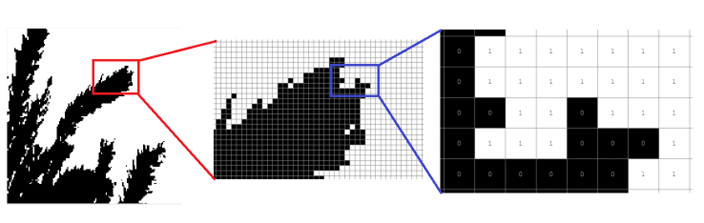

> El tamaño de las imágenes a diferencia de las matrices se describe poniendo primero el número total de columnas o píxeles de ancho y después el número total de filas o píxeles de alto. Toma esto en cuenta porque cuando manejemos la información dentro de TensorFlow utilizaremos más la representación matricial donde se define primero el número de filas y después el número de columnas.

In [2]:
import tensorflow as tf
import PIL.Image

In [ ]:
#Monta los archivos de nuestro Drive para que puedan usarse en Colab
#from google.colab import drive
#drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Establecemos el directorio de la base de datos
#BASE_DIR = '/content/drive/MyDrive/DL_tensorflow/Tema2/'


In [1]:
BASE_DIR = "C://Users//atorr//OneDrive - Instituto Politecnico Nacional//Documents//Tec//TC_3007_IA//Tensorflow//images//"


### Keras 
Keras es una API de alto nivel para Deep-Learning, que permite facilmente crear, entrenar, evalua y ejecutar redes neuronales. 

Keras ya está incluido dentro de TensorFlow por lo que únicamente debemos colocar el nombre de la función que queremos utilizar. Como siguiente paso genera un bloque nuevo en tu cuaderno de Colab y coloca el siguiente código:

In [3]:
# Función para cargar imagen
# La función recibe dos parámetros uno que es la ruta de donde se encuentra
# la imagen y el segundo sirve para especificar el modo de color
imagen1 = tf.keras.preprocessing.image.load_img(BASE_DIR+'trigobn.jpg',color_mode='grayscale')
print(imagen1)

<PIL.JpegImagePlugin.JpegImageFile image mode=L size=224x224 at 0x1E3D9FAC490>


El código anterior utiliza una función dentro de Keras que se llama ```load_img``` la cual nos ayuda a cargar una imagen para poder trabajar con ella dentro de TensorFlow. La función recibe dos parámetros uno que es la ruta de donde se encuentra la imagen que quieres cargar ```BASE_DIR+'trigobn.jpg'``` y el segundo sirve para especificar el modo de color que será “grayscale” esto debido a que este modo es útil tanto para representar imágenes en blanco y negro y en escala de grises. 

La cual especifica entre lo más importante la extensión de la imagen cargada y el tamaño 224x224 el cual define el ancho y alto de la imagen.

El siguiente paso es convertir la imagen cargada en una matriz para esto usaremos nuevamente Keras y la función ```mg_to_array```. 

La línea del código anterior convierte la imagen cargada en un arreglo de numpy para que podamos representar la matriz de píxeles asociada. Lo que obtendremos en la salida es el valor de cada píxel que conforma la imagen. Si observas detenidamente la salida verás que tenemos solo dos valores posibles 0 y 255 esto es debido a que no existe un modo de imagen en blanco y negro y tenemos que trabajar en escala de grises donde el color negro es 0 y el color blanco 255. 



In [4]:
# Convierte la imagen cargada en un arreglo de numpy para que
# podamos representar la matriz de píxeles asociada
matriz_imagen1 = tf.keras.preprocessing.image.img_to_array(imagen1)
print(matriz_imagen1)
print(type(matriz_imagen1))

[[[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 ...

 [[  0.]
  [  0.]
  [  0.]
  ...
  [255.]
  [255.]
  [255.]]

 [[  0.]
  [  0.]
  [  0.]
  ...
  [255.]
  [255.]
  [255.]]

 [[  0.]
  [  0.]
  [  0.]
  ...
  [255.]
  [255.]
  [255.]]]
<class 'numpy.ndarray'>


Si en un momento necesitaras visualizar la imagen cargada dentro de Python lo puedes hacer con la siguiente línea de código, copia, pega y ejecuta el comando en un nuevo bloque de código:

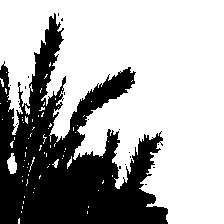

In [5]:
# Visualizar la imagen cargada
PIL.Image.open(BASE_DIR+'trigobn.jpg')

Estamos generando un tensor constante con la matriz que extrajimos al cargar la imagen. La forma dentro de TensorFlow específica primero el número de filas que es el alto de la imagen y después el número de columnas que es el ancho de la imagen.

In [6]:
tensor_imagen1 = tf.constant(matriz_imagen1)
print(tensor_imagen1.get_shape())
print(tensor_imagen1.dtype)

(224, 224, 1)
<dtype: 'float32'>


A grandes rasgos en el código estamos generando un tensor constante con la matriz que extrajimos al cargar la imagen. Para ya no volver a visualizar el contenido del tensor puesto que es el mismo que la matriz que ya vimos lo que vamos a hacer es visualizar únicamente la forma y el tipo de dato que almacena. 

La forma dentro de TensorFlow específica primero el número de filas que es el alto de la imagen y después el número de columnas que es el ancho de la imagen. Sin embargo, puedes notar que tenemos un tercer elemento el cual especifica el número de valores asociados al píxel que en este caso es 1. Otra cosa importante que hay que resaltar es el tipo de dato debido a que si bien los valores de cada píxel son enteros vamos a utilizar más adelante valores flotantes para representar esta información.

Regresando al problema que tienes como consultor del agricultor, es muy posible que las imágenes en escala de blanco y negro te permitan identificar formas, sin embargo, al solo ser dos colores nos puede limitar al momento de diferenciar cultivos con forma muy parecida. Para solucionar esto puedes cambiar a un formato más útil y con mucha más información como son las imágenes en escala de grises. En el caso de las imágenes en escala de grises nuevamente cada píxel que conforma la imagen tiene un valor numérico asociado, sin embargo, a diferencia de las imágenes en escala de blanco y negro donde solo había dos valores posibles 0 y 1, en una imagen en escala de grises cada píxel puede tener asociado un valor numérico de 0 a 255.

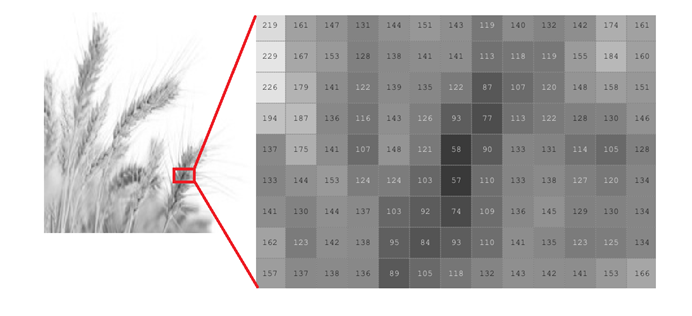

Si miras detenidamente los píxeles de la ilustración anterior que contienen trigo te puedes dar cuenta que aquellos píxeles con tonalidades claras, es decir cercanas al blanco su valor es cercano a 255, en contraste con aquellos píxeles que son más oscuros que su valor es cercano a 0. Nuevamente, un tensor puede ayudarnos a representar una imagen es escala de grises a través de una matriz. Analizando la situación detenidamente te podrás dar cuenta que en una imagen en escala de grises es más fácil visualmente identificar el trigo, así como también los píxeles contiene más información que nos podría ayudar a diferenciar entre otros cultivos.

Para representar una imagen en escala de grises y utilizarla en TensorFlow vamos a seguir el mismo procedimiento que con las imágenes en blanco y negro. 

In [8]:
# En escala de grises
imagen2 = tf.keras.preprocessing.image.load_img(BASE_DIR+'trigogs.jpg',color_mode='grayscale')
matriz_imagen2 = tf.keras.preprocessing.image.img_to_array(imagen2)
tensor_imagen2 = tf.constant(matriz_imagen2)
print(tensor_imagen2)

tf.Tensor(
[[[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 ...

 [[175.]
  [193.]
  [209.]
  ...
  [255.]
  [255.]
  [255.]]

 [[177.]
  [194.]
  [207.]
  ...
  [255.]
  [255.]
  [255.]]

 [[181.]
  [195.]
  [203.]
  ...
  [255.]
  [255.]
  [255.]]], shape=(224, 224, 1), dtype=float32)


Como notaras los valores que conforman el tensor se encuentran dentro del intervalo de 0 a 255 tal y como en la descripción de una imagen en escala de grises. La forma es la misma que la imagen en escala de blanco y negro que cargamos primero puesto que también solo es necesario un valor para especificar el color del píxel en escala de grises. 
 


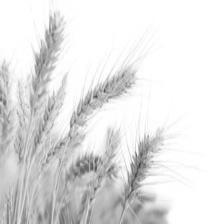

In [10]:
# Visualizar la imagen cargada
PIL.Image.open(BASE_DIR+'trigogs.jpg')

Si bien al tratar de representar la información de los cultivos necesitarás más datos para detectar características que te permitieran diferenciar de forma más precisa los diferentes cultivos una alternativa sería trabajar con imágenes a color. Donde el color te daría otro elemento para poder diferenciar por ejemplo cultivos con una forma parecida pero que son cosas diferentes como el trigo y el maíz. 

En el caso de las imágenes a color vamos a necesitar 3 valores numéricos para describir un píxel uno para el color rojo, otro para el verde y uno para el azul a diferencia de las imágenes en blanco y negro y escala de grises donde solo necesitamos un valor numérico para definir como se verá cada píxel de la imagen. Estos tres colores primarios nos ayudarán a representar todos los demás colores haciendo una combinación de ellos. Cada color nuevamente tendrá un valor asociado entre 0 y 255.

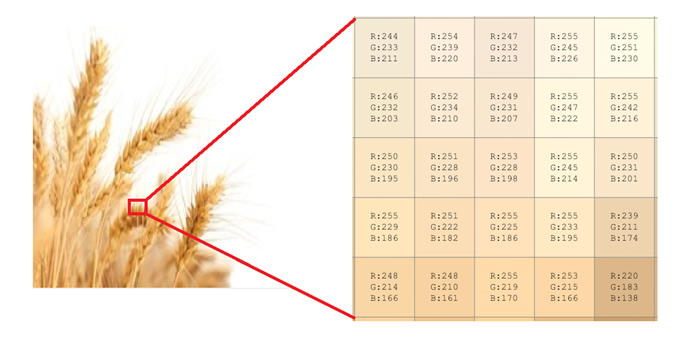

Como se observa en la ilustración anterior del trigo cada píxel tiene 3 valores numéricos R (red) para rojo, G (green) para verde y B (blue) para azul que van de 0 a 255. Es importante mencionar que las imágenes solamente admiten valores enteros para definir cada píxel en las tres escalas blanco y negro, grises y a color, no obstante, cuando son manejadas por TensorFlow pueden utilizarse valores decimales, es decir flotantes. 

Dado que ahora tenemos 3 valores numéricos por píxel en nuestra imagen la forma en que TensorFlow nos ayudará a representar estos datos dentro de un tensor será nuevamente con una matriz, pero dentro de cada elemento de la matriz que define un píxel estará un vector con los 3 valores numéricos asociados al componente R, G, y B. En la ilustración de abajo utilizamos un ejemplo de una imagen a color de 400 píxeles de alto por 300 pixeles de ancho que es representada por una matriz con vectores para genera un tensor de 400x300x3 donde los dos primeros números determinan el alto y ancho de la imagen y el tercer valor es el número de valores por vector que son 3 por las componentes RGB.

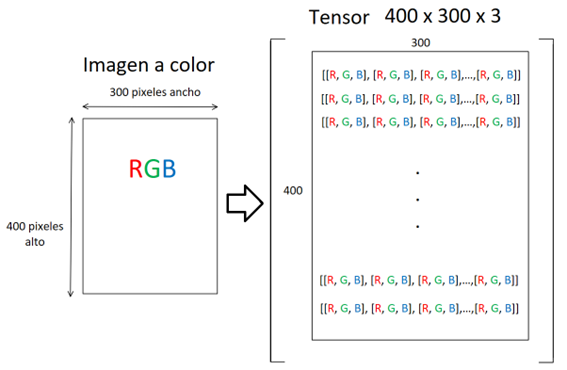

Ahora visualizaremos una imagen a color dentro de TensorFlow

In [9]:
imagen3 = tf.keras.preprocessing.image.load_img(BASE_DIR+'trigorgb.jpg')
matriz_imagen3 = tf.keras.preprocessing.image.img_to_array(imagen3)
tensor_imagen3 = tf.constant(matriz_imagen3)
print(tensor_imagen3)

tf.Tensor(
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[223. 166.  95.]
  [241. 184. 113.]
  [255. 199. 129.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[225. 168.  97.]
  [242. 185. 114.]
  [255. 197. 127.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[229. 172. 101.]
  [243. 186. 115.]
  [252. 193. 123.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]], shape=(224, 224, 3), dtype=float32)


Como podrás ver la forma del tensor cambio dado que ahora tenemos 224 píxeles de alto por 224 píxeles de ancho y por cada píxel tenemos 3 valores.

En ocasiones pueden existir imágenes que tengan un cuarto componente llamado alfa dando lugar al formato RGBA. Este cuarto componente define la opacidad que ayuda a definir regiones translucidas o transparentes en la imagen. Si deseas cargar una imagen utilizando este formato deberás especificarlo dentro del parámetro ```color_mode``` colocando un valor de ```rgba``` cuando utilices la función ```load_img```.


Finalmente vamos a hacer la cuenta de cuantos datos conforman cada una de las imágenes utilizadas. Esto es muy importante debido a que como consultor debes orientar en el manejo de grandes volúmenes de datos al agricultor. En el caso de las imágenes en escala de blanco y negro y grises cada una tiene 50,176 datos numéricos resultado que obtenemos al multiplicar los píxeles de alto por los píxeles de ancho 224x224 y en el caso de la imagen a color tenemos 150,528 datos numéricos debido a que por cada píxel necesitamos 3 valores numéricos para definir el color, es decir, 224x224x3. Más a adelante descubrirás que TensorFlow maneja lotes de información con el objetivo de procesar y realizar operaciones paralelas no solo a una sola matriz sino a un gran número de ellas. Es por eso por lo que el número de matrices que conforma un lote se le agrega como primer valor a la forma del tensor (tamaño del lote, alto, ancho, canales).

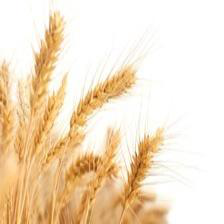

In [11]:
# Visualizar la imagen cargada
PIL.Image.open(BASE_DIR+'trigorgb.jpg')

### Subtema Convolucion, padding y stride

Empresas de diversos sectores como por ejemplo el automotriz han tenido la necesidad de creación de modelos inteligentes de datos que tienen como base el uso de imágenes o videos que son una secuencia de imágenes. Una de las aplicaciones más relevantes de los modelos inteligentes es la conducción autónoma de vehículos lo que requiere indudablemente utilizar imágenes de nuestro entorno. 

Para lograr la creación de un modelo inteligente enfocado a la conducción autónoma es necesario recopilar primero las imágenes que utilizaremos para su creación. Después tenemos que representarlas directamente en TensorFlow utilizando Keras. Sin embargo, el proceso de generación no termina cuando cargamos las imágenes, sino que hay que procesarlas.

Te preguntaras ¿Por qué es importante procesar los datos dentro de las imágenes para generar nuestro modelo inteligente? Para que te puedas dar una idea de la importancia de tratar los datos considera la siguiente foto tomada desde adentro de un automóvil:

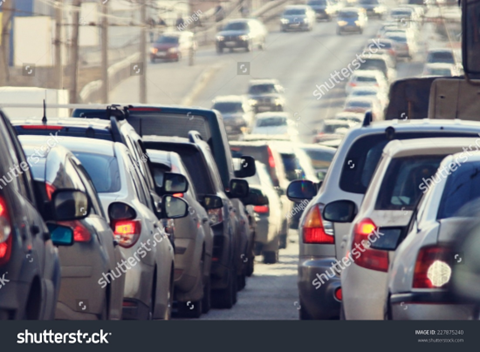

Regresando a nuestra situación real que es la conducción autónoma, el vehículo debe estar fotografiando su entorno en cada momento.  La imagen anterior tiene un tamaño de 1500x1100 (recuerda que las imágenes describen primero el ancho y después el alto). Como la imagen está en formato RGB cada píxel tiene 3 valores numéricos por lo que tendríamos un total de 1,500x1100x3 = 4,950,000 datos numéricos por imagen. Ahora bien, si tuviéramos un total de 10 imágenes tomadas del entorno por cada segundo en un minuto tendrías 2,970,000,000 datos numéricos que procesar.  Este gran volumen de datos debe ser procesado dentro del modelo de tal forma que se puedan extraer los elementos más relevantes. Como son muchos datos surge la necesidad de realizar operaciones que nos permitan reducir la cantidad de información de tal forma que solo conservemos los más importante.

La convolución es una operación que nos ayudará a centrarnos en los datos importantes dentro de una imagen. Para realizar esta operación se necesitan generalmente dos matrices, la primera es nuestra imagen y la segunda matriz es un elemento al que llamaremos kernel. Para saber cómo trabaja la convolución volveremos a nuestra situación real considerando un segmento de imagen de la vista interior de un automóvil de tamaño 6x6 píxeles con la intención de poder comprender el concepto de mejor forma trabajando con pocos datos.


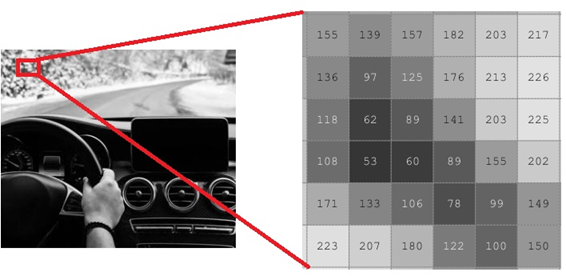

La primera tarea que debemos llevar a cabo es la representación de la información dentro de un tensor. 

In [15]:
vista = tf.constant([[155,139,157,182,203,217],[136,97,125,176,213,222],[118,62,	89,141,	203,225],[108,53,	60,89,155,202],[171,133,106,78,99,149],[223,207,180,122,100,150]])

In [16]:
vista = tf.constant([[155,139,157,182,203,217],[136,97,125,176,213,222],[118,62,	89,141,	203,225],[108,53,	60,89,155,202],[171,133,106,78,99,149],[223,207,180,122,100,150]])
print(vista)

tf.Tensor(
[[155 139 157 182 203 217]
 [136  97 125 176 213 222]
 [118  62  89 141 203 225]
 [108  53  60  89 155 202]
 [171 133 106  78  99 149]
 [223 207 180 122 100 150]], shape=(6, 6), dtype=int32)


Como salida obtendrás un tensor con los datos de la imagen, con una forma 6x6 y como tipo de dato int32.

Antes de comenzar con la convolución es recomendable normalizar los datos dentro de nuestra imagen, es decir, ajustarlos a un intervalo de números entre 0 y 1 esto con la intención de manejar datos numéricos no tan grandes para facilitar así su manejo dentro de TensorFlow

In [17]:
# Normalizar imagen para obtener valores entre 0 y 1
vista_norm = vista/255
print(vista_norm)

tf.Tensor(
[[0.60784314 0.54509804 0.61568627 0.71372549 0.79607843 0.85098039]
 [0.53333333 0.38039216 0.49019608 0.69019608 0.83529412 0.87058824]
 [0.4627451  0.24313725 0.34901961 0.55294118 0.79607843 0.88235294]
 [0.42352941 0.20784314 0.23529412 0.34901961 0.60784314 0.79215686]
 [0.67058824 0.52156863 0.41568627 0.30588235 0.38823529 0.58431373]
 [0.8745098  0.81176471 0.70588235 0.47843137 0.39215686 0.58823529]], shape=(6, 6), dtype=float64)


Si observas el nuevo tensor que se creo tiene como tipo de dato float64 esto debido a que los valores del nuevo tensor son todos flotantes. Como siguiente paso vamos a generar el kernel, esta matriz operara sobre la vista normalizada que extrajimos de la imagen principal. El tamaño recomendado de la matriz que utilizaremos como kernel es de 3x3, 5x5, 7x7 esto debido a que dichas configuraciones tienen un píxel central que nos beneficiará en el cálculo de la convolución más adelante.

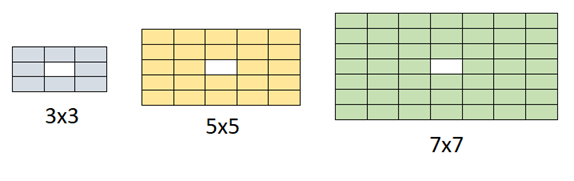


Con respecto a los valores numéricos que tiene el kernel existen diversos métodos para generarlos aleatoriamente e incluso existen kernels ya definidos para diversos propósitos como por ejemplo para reducir la cantidad de variaciones de intensidad en una imagen, la detección de bordes, y eliminación de ruido. En nuestro caso utilizaremos un kernel generado por el método de “GlorotUniform” que es el que utiliza Keras por default, es posible que el método genera tanto valores positivos como negativos. Si quieres observar cómo trabaja el método puedes crear un nuevo bloque de código, pegar y ejecutar las siguientes líneas:

In [18]:
# Utilizaremos un kernel generado por el método de “GlorotUniform”
initializer = tf.keras.initializers.GlorotUniform()
valores = initializer(shape=(3, 3))
print(valores)

tf.Tensor(
[[ 0.6214149  -0.5602124  -0.5042777 ]
 [ 0.50667334 -0.76862764 -0.2598455 ]
 [ 0.5354531   0.24554849 -0.21073842]], shape=(3, 3), dtype=float32)


Es muy posible que tu resultado sea diferente al que te mostramos debido a que los números generados son aleatorios por lo que cada vez que ejecutes el bloque de código tendrás un resultado diferente. Para que obtengamos los mismos resultados vamos a colocar los valores obtenidos del bloque de código anterior en un nuevo tensor dentro de un bloque de código nuevo:

In [19]:
kernel = tf.constant([[-0.25990390, 0.59965350, -0.21581721],[0.69995356, -0.00377226, -0.88592770],[0.16243601, 0.65105224, -0.30156302]],dtype=tf.float64)
print(kernel)

tf.Tensor(
[[-0.2599039   0.5996535  -0.21581721]
 [ 0.69995356 -0.00377226 -0.8859277 ]
 [ 0.16243601  0.65105224 -0.30156302]], shape=(3, 3), dtype=float64)




Ya con la matriz extraída de la vista interna del automóvil y definido el kernel podemos realizar la convolución. La convolución es una serie de operaciones internas que se hacen a una matriz A (color azul) utilizando un kernel (color naranja).



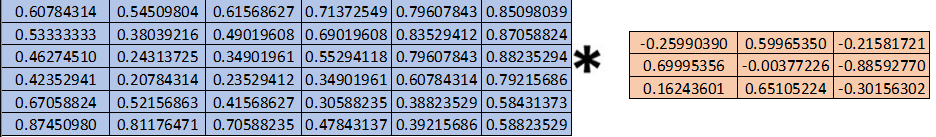


Las operaciones que vamos a realizar son multiplicaciones y sumas y el resultado que obtendremos será también una matriz, pero de menores dimensiones. Para comenzar nos posicionaremos en la siguiente región de la matriz A:


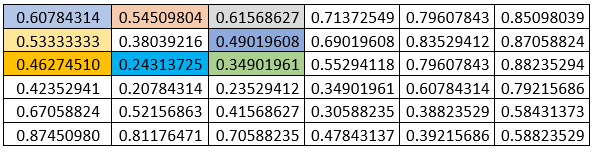


Siempre utilizaremos todos los elementos del kernel para operar:

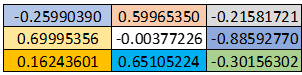

Si observas detenidamente los colores de la región de la matriz y el kernel coindicen, esto es debido a que cada celda del mismo color tanto de la matriz como del kernel se van a multiplicar y se sumaran todos los resultados. El valor resultante será nuestro primer resultado de la convolución. La operación que se realiza es la siguiente:

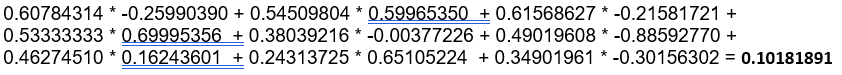

El resultado obtenido va a formar parte de la matriz final.

```0.10181891```

Continuando con la convolución ahora la región coloreada de la matriz la moveremos una columna a la derecha.

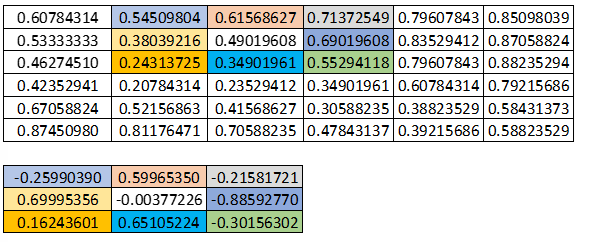

El kernel seguirá siendo el mismo, pero como te puedes dar cuenta la región coloreada en la matriz cambio. A pesar del cambio seguiremos haciendo las mismas operaciones multiplicaciones y sumas con cada celda tanto de la matriz como del kernel:

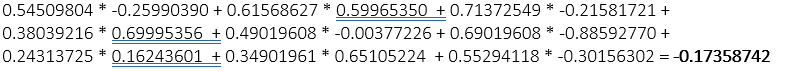

Agregando este nuevo resultado al que ya teníamos la matriz resultante se vería de la siguiente forma:

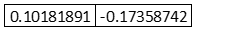

Una vez más movemos una columna hacia la derecha nuestra región coloreada en la matriz para operar con los siguientes elementos:

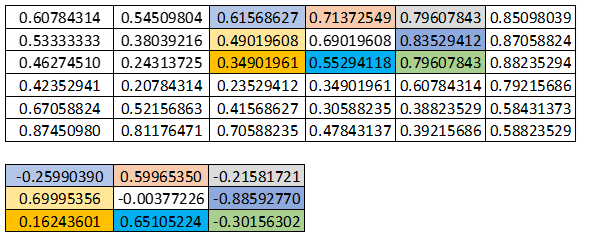

Las operaciones a a realizar son las siguientes:

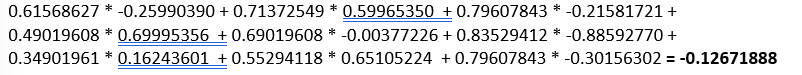

La matriz resultante parcial queda de la siguiente forma:

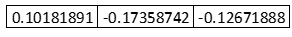

Si observas detenidamente de la región coloreada obtenemos solo un elemento que colocamos en la matriz resultante. La siguiente región con la que operaremos y las operaciones respectivas se muestran a continuación:

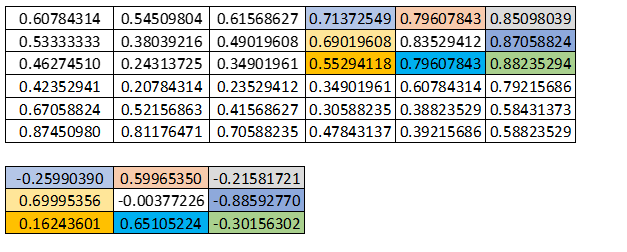

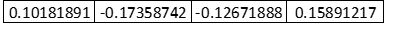

Si miras detenidamente ya no podemos desplazarnos una columna a la derecha porque ya no estaríamos dentro de la matriz por lo que ahora tendremos que empezar desde la primera columna nuevamente, pero bajando ahora una fila como se muestra en la siguiente ilustración:

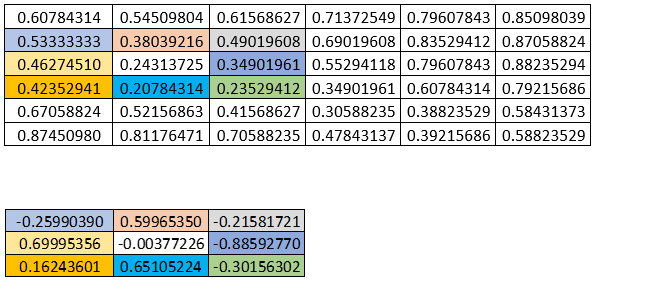

El kernel se mantiene sin modificaciones y continuamos con las operaciones:

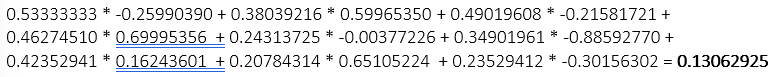

Al igual que el movimiento que hicimos en la matriz que estamos operando el resultado de la matriz resultante que obtuvimos lo agregaremos en la primera columna, pero en una segunda fila:

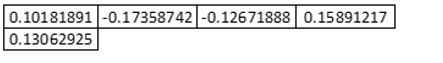

Se repite hasta pasar todo el kernel por la imagen...

La matriz resultante final será la siguiente:

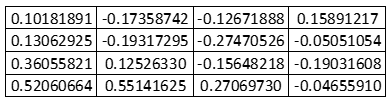


Es momento de analizar los resultados que hemos obtenido, si te das cuenta nuestra matriz inicial es una matriz de 6x6 y el kernel que utilizamos para realizar la convolución es de 3x3. El resultado final que obtuvimos es una matriz de 4x4. Como notarás la matriz final 4x4 es de menor dimensión que la matriz inicial 6x6 esto es más que nada determinado por el tamaño de la matriz kernel. Es importante que consideres trabajar con kernels con dimensiones impares como te lo mencionamos antes esto debido a que para calcular las dimensiones de la matriz de salida podrías aplicar la siguiente formula:

num de filas de la matriz final = num de filas de la matriz inicial – num de filas del kernel + 1

num de cols de la matriz final = num de cols de la matriz inicial – num de cols del kernel + 1

Por ejemplo, si consideramos la imagen completa de la vista interior del automóvil con un tamaño de 1500x1100 y realizamos la convolución con un kernel de 3x3 la imagen resultante sería una matriz de 1498x1098 y si el kernel fuera de 7x7 entonces la imagen resultante sería de 1494x1094.


Por ejemplo, si consideramos la imagen completa de la vista interior del automóvil con un tamaño de 1500x1100 y realizamos la convolución con un kernel de 3x3 la imagen resultante sería una matriz de 1498x1098 y si el kernel fuera de 7x7 entonces la imagen resultante sería de 1494x1094.

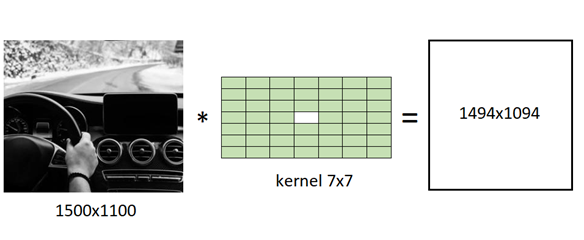


Ahora bien, imagina que la empresa automotriz para la que trabajas desea construir un modelo inteligente para la detección de objetos en el camino y uno de sus requerimientos es no reducir el tamaño de la imagen resultante al aplicar la convolución. Para que puedas cumplir con este requerimiento introducimos un nuevo concepto llamado padding. El padding es una operación que se realiza antes de la convolución que lo que va a hacer es agregar un marco de ceros a nuestra imagen original de tal forma que la imagen resultante después de la convolución sea de la misma dimensión que la imagen original. Tomando nuevamente como ejemplo el segmento de la imagen de la vista interior del auto lo que tendremos que hacer para aplicar el padding es agregar un contorno de ceros a la matriz inicial. La dimensión del marco de ceros depende de la dimensión del kernel, si el kernel es de 3x3 para que la matriz resultante quede del mismo tamaño se agregará un marco de ceros, si es de 5x5 se agregará un marco doble de ceros y si es de 7x7 el marco tendrá que ser triple. Para ejemplificar esto utilizaremos la siguiente ilustración:

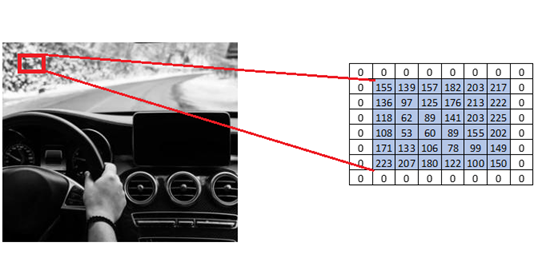


El segmento original que extrajimos de la imagen anterior es de 6x6 (región azul), para mantener la misma dimensión después de la convolución al utilizar un kernel de 3x3, requeriremos un solo marco (región blanca) de padding. Debido al padding que aplicaremos la nueva matriz inicial nos quedaría de 8x8. El resultado que tendremos después de la convolución será una matriz de 6x6 justamente la dimensión de la matriz inicial (región azul). A continuación, te mostramos un ejemplo de convolución utilizando la región de la imagen de la vista del interior del vehículo sin normalizar con un kernel de 3x3:

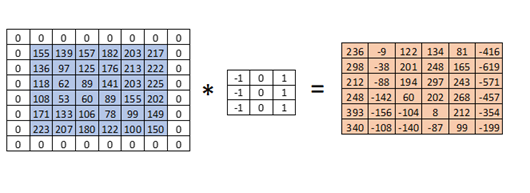


Si observas la matriz resultante en color naranja es del mismo tamaño 6x6 que el segmento original que extrajimos de la imagen de la vista interior.

Una vez definido lo que es el padding podemos decir que hay dos tipos de convolución una sin padding donde vamos a esperar una reducción dependiendo del tamaño del kernel en las dimensiones de la matriz resultante y una con padding donde la matriz resultante será del mismo tamaño que la matriz inicial.

Otro concepto importante implícito dentro de la convolución es el llamado stride que se refiere al desplazamiento horizontal y vertical del kernel para realizar las operaciones dentro de la matriz inicial. En el caso de nuestro ejemplo, el stride fue de [1, 1] debido a que horizontalmente nos movíamos una columna a la derecha y cuando llegábamos al final bajábamos una fila y regresábamos al inicio. Por defecto los valores recomendados para realizar el stride son desplazamiento de una unidad tanto horizontal como vertical, sin embargo, si llegaran a cambiar el tamaño final de la matriz resultante se vería afectado tanto por la configuración del stride como por el tamaño del kernel.

In [20]:
# Cambiar la forma de un tensor y producir otro con diferente forma
# [tamaño del batch, alto de la imagen de entrada, ancho de la imagen de entrada,
# # de canales de entrada]
imagen  = tf.reshape(vista_norm, [1, 6, 6, 1], name='imagen')

In [22]:
k = tf.reshape(kernel, [3, 3, 1, 1], name='kernel')

Al ejecutar el código no obtendremos ninguna salida, sin embargo, la acción que realiza la función tf.reshape es cambiar la forma de un tensor y producir otro con diferente forma que viene siendo el segundo parámetro de la función ```[1, 6, 6, 1]```.  Es importante mencionar que al utilizar la función reshape el número de elementos del primer tensor debe ser también el mismo que exprese el nuevo tensor en su nueva forma. Por ejemplo, el tensor inicial tiene una forma de 6x6 lo cual nos da un total de 36 datos por los que nuestra nueva forma debe tener el mismo número de datos. La nueva forma indica lo siguiente para la matriz inicial:

[tamaño del batch, alto de la imagen de entrada, ancho de la imagen de entrada, num de canales de entrada]


En el caso particular de nuestra imagen de prueba solamente aplicaremos la convolución a una imagen por lo que el tamaño del batch es de 1 si fueran más imágenes el valor de este parámetro incrementaría, el alto de la imagen son 6 pixeles al igual que el ancho y finalmente el número de canales de entrada se relaciona con el formato de la imagen, es decir el número de valores numéricos necesarios para expresar el color de cada píxel. Por ejemplo, como la imagen esta en escala de grises entonces el número de canales de entrada será de 1 si fuera RGB entonces el número de canales de entrada sería 3.

Para el kernel la información de cambio de forma del tensor [3, 3, 1, 1] tiene otro significado que se te muestran a continuación:

[alto del kernel, ancho del kernel, num de canales de entrada, num de canales de salida]

Como podrás ver el alto y ancho del kernel es de 3 píxeles, los canales de entrada la imagen inicial dado que esta en escala de grises es de 1 y los canales de salida que esperamos en la matriz resultante son igual a 1. Este cambio de forma de los tensores asociados a la matriz inicial y el kernel es necesario para poder realizar la convolución con TensorFlow. 


In [23]:
# Cambio de tensor
# [alto del kernel, ancho del kernel, # de canales de entrada,
# # de canales de salida]
conv=tf.reshape(tf.nn.conv2d(imagen, k, [1, 1, 1, 1], padding="VALID"), [4,4])
print(conv)

tf.Tensor(
[[ 0.10181891 -0.17358742 -0.12671888  0.15891217]
 [ 0.13062925 -0.19317295 -0.27470526 -0.05051054]
 [ 0.36055821  0.1252633  -0.15648218 -0.19031608]
 [ 0.52060664  0.55141625  0.2706973  -0.0465591 ]], shape=(4, 4), dtype=float64)


La primera línea del código anterior hace uso de la función tf.nn.conv2d que realiza la convolución. La descripción de los parámetros de entrada de esta función es la siguiente: el primer valor indica el tensor asociado con la matriz inicial normalizada imagen, el segundo valor es el tensor que contiene el kernel k que utilizaremos en la convolución, el tercer elemento define el stride que en este caso es un arreglo con 4 valores esto es debido que tenemos que especificar cual va a ser el desplazamiento por el lote de las imágenes, después es el desplazamiento vertical y horizontal que tendremos dentro de la imagen inicial como lo habíamos definido anteriormente cuando introdujimos el término stride y finalmente esta el desplazamiento entre los canales. El último parámetro de la función tf.nn.conv2d  define si la convolución tendrá o no padding, en este caso si el valor del padding es "VALID" estamos indicado que será una convolución sin padding, pero si es "SAME" entonces será una convolución con padding. En nuestro caso vamos a cambiar la forma del tensor resultante de aplicar la convolución utilizando tf.reshape para que puedas comparar el resultado que obtuvimos haciendo los cálculos manualmente y el que obtiene TensorFlow.